In [4]:
%matplotlib inline
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('chestXray-dark-jpg.jpg')

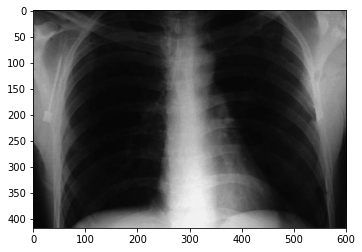

In [5]:
# display the image
plt.imshow(img, cmap='gray')

In [6]:
# convert image into a numpy array
img = np.asarray(img)

(array([9.4000e+01, 3.7592e+04, 3.4478e+04, 2.7087e+04, 9.8650e+03,
        1.0302e+04, 5.9460e+03, 6.2850e+03, 4.3810e+03, 4.6580e+03,
        3.4600e+03, 4.7940e+03, 4.9970e+03, 3.8160e+03, 5.0620e+03,
        3.6360e+03, 3.7560e+03, 3.2500e+03, 3.6380e+03, 2.8040e+03,
        3.5800e+03, 2.8270e+03, 3.7970e+03, 2.5720e+03, 4.2560e+03,
        3.4880e+03, 3.9480e+03, 4.6160e+03, 4.6050e+03, 5.7220e+03,
        3.2580e+03, 6.0250e+03, 2.4050e+03, 2.7840e+03, 2.0700e+03,
        1.8690e+03, 1.6470e+03, 1.1390e+03, 1.4620e+03, 7.4500e+02,
        9.6900e+02, 1.0670e+03, 6.1300e+02, 6.6800e+02, 1.4960e+03,
        8.9500e+02, 1.2520e+03, 1.8880e+03, 6.5000e+01, 7.0000e+00]),
 array([  1.  ,   5.54,  10.08,  14.62,  19.16,  23.7 ,  28.24,  32.78,
         37.32,  41.86,  46.4 ,  50.94,  55.48,  60.02,  64.56,  69.1 ,
         73.64,  78.18,  82.72,  87.26,  91.8 ,  96.34, 100.88, 105.42,
        109.96, 114.5 , 119.04, 123.58, 128.12, 132.66, 137.2 , 141.74,
        146.28, 150.82, 155.36

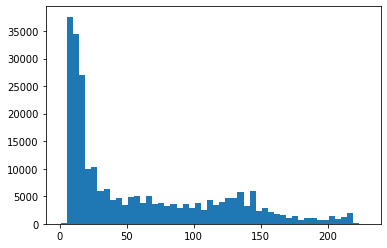

In [7]:
# put pixels in a 1D array by flattening out img array
flat = img.flatten()

# show the histogram
plt.hist(flat, bins=50)

In [8]:
# formula for creating the histogram
display(Math(r'P_x(j) = \sum_{i=0}^{j} P_x(i)'))

<IPython.core.display.Math object>

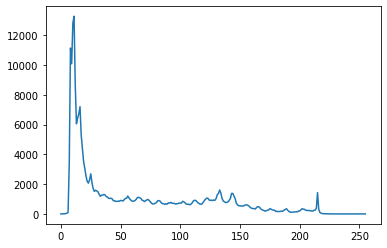

In [9]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

hist = get_histogram(flat, 256)

plt.plot(hist)

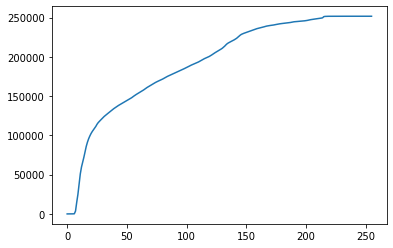

In [10]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

In [11]:
# formula to calculate cumulation sum
display(Math(r's_k = \sum_{j=0}^{k} {\frac{n_j}{N}}'))

<IPython.core.display.Math object>

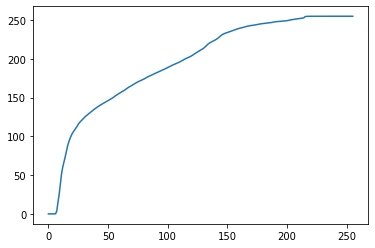

In [12]:
# re-normalize cumsum values to be between 0-255

# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cdf
cs = nj / N

plt.plot(cs)

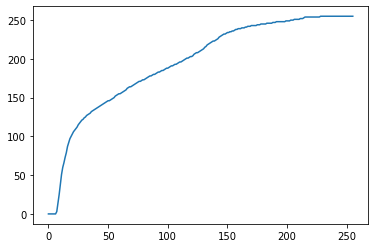

In [13]:
# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

(array([ 3644.,     0., 11140.,     0., 10080.,     0.,     0., 12822.,
            0.,     0., 13275.,  8704.,  6053.,     0.,  6446.,  6711.,
            0.,  7201.,  5287.,  7888.,  5604.,  6547.,  4798.,  4810.,
         4354.,  5011.,  5655.,  4658.,  5216.,  4240.,  6519.,  4334.,
         5456.,  5232.,  4774.,  4937.,  4912.,  5096.,  4710.,  5169.,
         5869.,  3771.,  5669.,  5061.,  4715.,  5167.,  5053.,  5135.,
         4922.,  4991.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer object of 50 artists>)

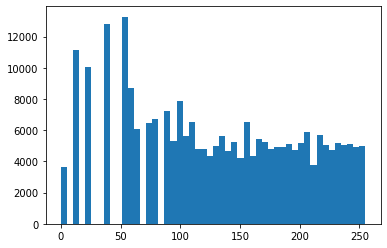

In [14]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# we see a much more evenly distributed histogram
plt.hist(img_new, bins=50)

In [15]:
# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)
img_new

array([[254, 215, 142, ..., 210, 250, 250],
       [254, 218, 143, ..., 212, 250, 250],
       [254, 220, 144, ..., 216, 250, 250],
       ...,
       [204,  66,  14, ...,  87, 163, 163],
       [208,  66,   0, ...,  87, 166, 166],
       [208,  66,   0, ...,  87, 166, 166]], dtype=uint8)

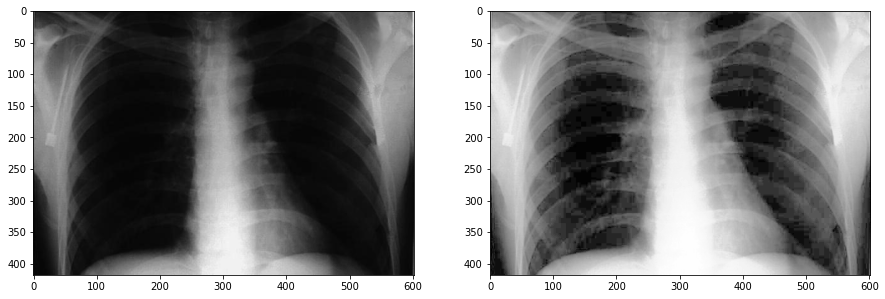

In [16]:
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)